In [3]:
# K Means Clustering
# Import Data Library
import numpy as np
import pandas as pd

# Import Graph Library
import matplotlib.pyplot as plt
import seaborn as sb

# Import Machine Learning Library
# Prevent memory leak on Windows with MKL
import os
os.environ["OMP_NUM_THREADS"] = "1"
import sklearn.cluster as skc

# Import Data Classification Library
import sklearn.model_selection as skms
import sklearn.preprocessing as skp

# Import Evaluation Library
import sklearn.metrics as skmt

In [4]:
# Set Data Frame
data_df = pd.read_excel('./data/사과-군집화.xlsx')
print (data_df.isna().sum())
print (data_df.info())
print (data_df)

kind      0
region    0
weight    0
height    0
width     0
sugar     0
sour      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kind    76 non-null     object 
 1   region  76 non-null     object 
 2   weight  76 non-null     float64
 3   height  76 non-null     float64
 4   width   76 non-null     float64
 5   sugar   76 non-null     float64
 6   sour    76 non-null     float64
dtypes: float64(5), object(2)
memory usage: 4.3+ KB
None
   kind region  weight  height  width  sugar  sour
0    후지     거창   283.6    78.3   87.0   13.0  0.39
1    홍로     거창   229.0    73.9   81.6   11.4  0.29
2    후지     거창   266.5    73.9   86.1   12.3  0.37
3    홍로     거창   176.7    66.8   73.7   11.0  0.31
4    홍로     군위   308.6    83.3   90.7   15.2  0.19
..  ...    ...     ...     ...    ...    ...   ...
71   후지     화성   384.2    85.9   96.4   14.1  0.51
72 

In [11]:
# Convert Data 
convert_map_kind = {'홍로': 1, '후지': 2}
converted_data = data_df.copy()
converted_data['kind'] = converted_data['kind'].map(convert_map_kind)
label_encoder = skp.LabelEncoder()
converted_data['region'] = label_encoder.fit_transform(converted_data['region'])
print (label_encoder.classes_)
converted_data

['거창' '군위' '김제' '남해' '영주' '완주' '완주2' '장수' '청송' '춘천' '충주' '포천' '화성']


,kind,region,weight,height,width,sugar,sour
0,2,0,283.6,78.3,87.0,13.0,0.39
1,1,0,229.0,73.9,81.6,11.4,0.29
2,2,0,266.5,73.9,86.1,12.3,0.37
3,1,0,176.7,66.8,73.7,11.0,0.31
4,1,1,308.6,83.3,90.7,15.2,0.19
...,...,...,...,...,...,...,...
71,2,12,384.2,85.9,96.4,14.1,0.51
72,1,12,311.3,82.9,90.5,12.7,0.25
73,2,12,284.3,78.2,88.0,13.6,0.36
74,1,12,324.0,88.4,92.1,12.6,0.22


In [13]:
# Cluster Model K Means Clustering
kmc_model = skc.KMeans(n_clusters=6, random_state=0)
kmc_model = kmc_model.fit(converted_data)
print (kmc_model.labels_)
print (np.unique(kmc_model.labels_, return_counts=True))
kmc_model

[0 4 0 2 5 0 1 4 0 2 4 5 1 0 1 3 3 3 5 3 2 3 2 5 1 1 0 5 2 5 4 0 5 4 4 0 4
 4 0 5 4 0 4 4 0 4 4 4 4 0 1 4 4 5 1 4 5 1 0 1 4 1 4 4 1 5 5 3 5 5 3 3 5 0
 1 0]
(array([0, 1, 2, 3, 4, 5]), array([15, 12,  5,  8, 21, 15], dtype=int64))


KMeans(n_clusters=6, random_state=0)

In [17]:
# Evaluate Model
evaluation_data = converted_data.copy()
evaluation_data['cluster'] = kmc_model.labels_
evaluation_data.groupby('cluster').mean()

,kind,region,weight,height,width,sugar,sour
cluster,,,,,,,
0,1.533333,5.866667,280.673333,78.393333,87.680000,13.480000,0.302667
1,1.666667,7.416667,338.941667,84.133333,93.333333,14.300000,0.338333
2,1.000000,2.400000,182.100000,67.700000,74.480000,13.940000,0.256000
3,1.625000,6.000000,400.600000,88.487500,96.775000,14.487500,0.346250
4,1.428571,7.380952,249.242857,74.585714,84.319048,13.752381,0.316667
5,1.466667,7.333333,307.780000,81.380000,90.053333,13.813333,0.304667


In [19]:
evaluation_data.groupby('cluster')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,15.0,280.673333,7.576323,266.5,275.200,283.1,286.450,292.7
1,12.0,338.941667,11.584273,324.0,329.250,337.6,349.625,356.7
2,5.0,182.100000,29.155703,134.3,176.700,191.4,199.800,208.3
3,8.0,400.600000,26.528152,376.3,382.625,393.6,408.500,454.2
4,21.0,249.242857,11.493110,221.3,246.500,250.8,258.900,263.6
5,15.0,307.780000,8.518233,296.9,300.900,305.8,315.250,321.7


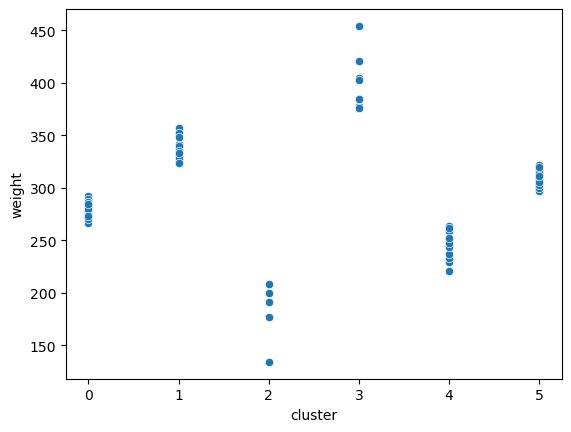

In [27]:
# Cluster Weight Graph
sb.scatterplot(x = evaluation_data['cluster'], y = evaluation_data['weight'])
plt.show()

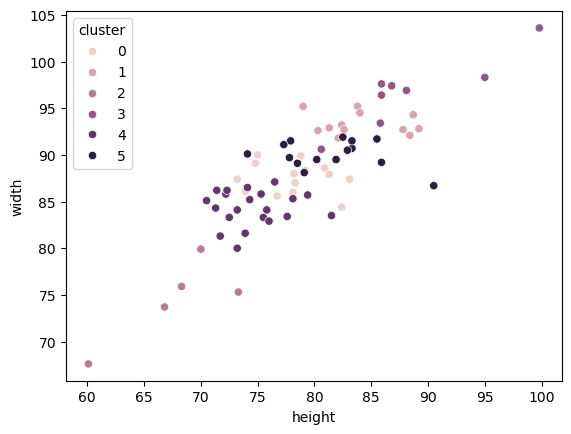

In [29]:
# Height Width Graph
sb.scatterplot(x = 'height', y = 'width', hue = 'cluster', data = evaluation_data)
plt.show()

In [37]:
# Analyze Data by Custom Data (Grade)
grade_data = evaluation_data.copy()
grade_data['grade'] = 0
grade_data.loc[(grade_data['weight'] >= 375), 'grade'] = 6
grade_data.loc[(grade_data['weight'] < 375) & (grade_data['weight'] >= 300), 'grade'] = 5 
grade_data.loc[(grade_data['weight'] < 300) & (grade_data['weight'] >= 250), 'grade'] = 4 
grade_data.loc[(grade_data['weight'] < 250) & (grade_data['weight'] >= 214), 'grade'] = 3 
grade_data.loc[(grade_data['weight'] < 214) & (grade_data['weight'] >= 188), 'grade'] = 2 
grade_data.loc[(grade_data['weight'] < 188) & (grade_data['weight'] >= 167), 'grade'] = 1 
grade_data

,kind,region,weight,height,width,sugar,sour,cluster,grade
0,2,0,283.6,78.3,87.0,13.0,0.39,0,4
1,1,0,229.0,73.9,81.6,11.4,0.29,4,3
2,2,0,266.5,73.9,86.1,12.3,0.37,0,4
3,1,0,176.7,66.8,73.7,11.0,0.31,2,1
4,1,1,308.6,83.3,90.7,15.2,0.19,5,5
...,...,...,...,...,...,...,...,...,...
71,2,12,384.2,85.9,96.4,14.1,0.51,3,6
72,1,12,311.3,82.9,90.5,12.7,0.25,5,5
73,2,12,284.3,78.2,88.0,13.6,0.36,0,4
74,1,12,324.0,88.4,92.1,12.6,0.22,1,5


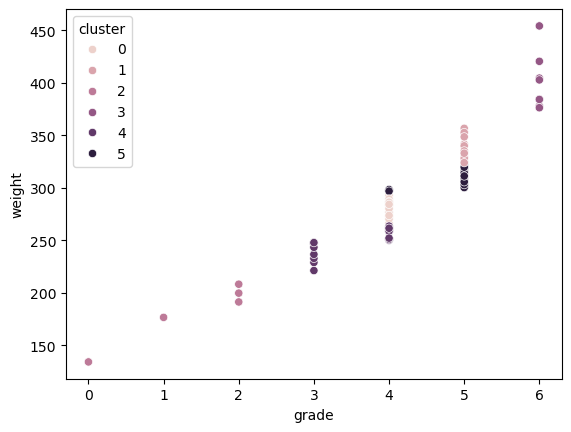

In [39]:
# Graph by Grade
sb.scatterplot(x = 'grade', y = 'weight', hue = 'cluster', data = grade_data)
plt.show()

In [45]:
# Evaluate Data
sil_avg_score = skmt.silhouette_score(converted_data, kmc_model.labels_)
sil_sample = skmt.silhouette_samples(converted_data, kmc_model.labels_)
sil_data = pd.DataFrame({'cluster' : kmc_model.labels_, 'silhouette' : sil_sample})
sil_mean = sil_data.groupby('cluster')['silhouette'].mean()
print ('Silhouette Avg :', sil_avg_score)
print ('Silhouette Sample :', sil_sample, len(sil_sample))
print ('Silhouette Mean :', sil_mean)
sil_data

Silhouette Avg : 0.4510515056730085
Silhouette Sample : [0.56656216 0.49025141 0.09102838 0.60628463 0.57820749 0.47880886
 0.56310898 0.61257759 0.13798186 0.19275698 0.56214083 0.20587167
 0.32451999 0.38949086 0.59737144 0.45371825 0.26488242 0.58886824
 0.41520844 0.44680462 0.44685855 0.56465847 0.47784838 0.49759456
 0.58771167 0.5353751  0.64594906 0.36090738 0.56583588 0.22126027
 0.63497393 0.59486856 0.19398831 0.65435559 0.19492381 0.50772662
 0.07149912 0.46075915 0.35847661 0.40549222 0.63762037 0.52673181
 0.32705383 0.64804245 0.6144665  0.36293019 0.43515268 0.60139369
 0.58696975 0.64167504 0.52832394 0.60920209 0.29128911 0.47117269
 0.59836206 0.26213001 0.11386601 0.6188454  0.51525932 0.04111685
 0.64759339 0.26257308 0.64550903 0.6050136  0.46236659 0.51746718
 0.23042259 0.204566   0.50358443 0.55715006 0.59037954 0.43122569
 0.59514146 0.56991357 0.00087387 0.47702219] 76
Silhouette Mean : cluster
0    0.474397
1    0.426712
2    0.457917
3    0.443138
4    0.49

,cluster,silhouette
0,0,0.566562
1,4,0.490251
2,0,0.091028
3,2,0.606285
4,5,0.578207
...,...,...
71,3,0.431226
72,5,0.595141
73,0,0.569914
74,1,0.000874
